In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
data=pd.read_csv('C:/Users/kgt_yslee/Desktop/광개토연구소/업무/키워드 통일 작업/데이터/익스포트.csv')

In [3]:
data.shape

(1405918, 12)

- data의 사이즈가 너무 크기 때문에, random sampling을 통해 data를 구축한다.
- data가 크면 자연어처리가 하루 이상 걸리게됨.

In [4]:
#sample_data = data.sample(frac=0.3).reset_index()
#sample_data.shape

In [5]:
data.head()

,KW_ID,KW,LANG,LOCALE,FIRST_WIPO_INDUSTRY,FIRST_MCC3,FIRST_MCC3_RATIO,FIRST_MCC4,FIRST_MCC4_RATIO,FIRST_MAIN_CPC,FIRST_MAIN_CPC_RATIO,KW_WORD_CNT
0,76,0th order,EN,US,Audio-visual technology,G11B,0.388889,G11B7/00,0.380117,G11B7/1353,0.096491,2
1,6009589,1 2 propanediol,EN,US,Macromolecular chemistry||polymers,C08G,0.222222,C08G64/00,0.222222,C07C51/235,0.222222,3
2,160,1 acetyl n,EN,US,Organic fine chemistry,C07D,0.698113,A61K31/00,0.188679,C07D487/04,0.113208,3
3,173,1 acid glycoprotein,EN,US,Analysis of biological materials,G01N,0.534351,G01N33/00,0.511450,G01N33/6893,0.236641,3
4,6016888,1 acylglycerol 3 phosphate o acyltransferase,EN,US,Biotechnology,C07H,0.250000,A61M1/00,0.250000,G01N33/74,0.250000,6


In [6]:
data["KW"] = data["KW"].str.strip()
data["KW"] = data["KW"].apply(str)
data['KW2'] = data['KW'].str.split(" ")

In [7]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

porter_stemmer = PorterStemmer()
lanca_stemmer = LancasterStemmer()
sb_stemmer = SnowballStemmer("english",)
lemmer = WordNetLemmatizer()

In [8]:
# stemming & lemmatize 적용

data['porter_stemmer'] = data['KW2'].apply(lambda x : [porter_stemmer.stem(y) for y in x])
data['lanca_stemmer'] = data['KW2'].apply(lambda x : [lanca_stemmer.stem(y) for y in x])
data['sb_stemmer'] = data['KW2'].apply(lambda x : [sb_stemmer.stem(y) for y in x])
data['lemmatize'] = data['KW2'].apply(lambda x : [lemmer.lemmatize(y) for y in x])

In [9]:
data.head()

,KW_ID,KW,LANG,LOCALE,FIRST_WIPO_INDUSTRY,FIRST_MCC3,FIRST_MCC3_RATIO,FIRST_MCC4,FIRST_MCC4_RATIO,FIRST_MAIN_CPC,FIRST_MAIN_CPC_RATIO,KW_WORD_CNT,KW2,porter_stemmer,lanca_stemmer,sb_stemmer,lemmatize
0,76,0th order,EN,US,Audio-visual technology,G11B,0.388889,G11B7/00,0.380117,G11B7/1353,0.096491,2,"[0th, order]","[0th, order]","[0th, ord]","[0th, order]","[0th, order]"
1,6009589,1 2 propanediol,EN,US,Macromolecular chemistry||polymers,C08G,0.222222,C08G64/00,0.222222,C07C51/235,0.222222,3,"[1, 2, propanediol]","[1, 2, propanediol]","[1, 2, propanediol]","[1, 2, propanediol]","[1, 2, propanediol]"
2,160,1 acetyl n,EN,US,Organic fine chemistry,C07D,0.698113,A61K31/00,0.188679,C07D487/04,0.113208,3,"[1, acetyl, n]","[1, acetyl, n]","[1, acetyl, n]","[1, acetyl, n]","[1, acetyl, n]"
3,173,1 acid glycoprotein,EN,US,Analysis of biological materials,G01N,0.534351,G01N33/00,0.511450,G01N33/6893,0.236641,3,"[1, acid, glycoprotein]","[1, acid, glycoprotein]","[1, acid, glycoprotein]","[1, acid, glycoprotein]","[1, acid, glycoprotein]"
4,6016888,1 acylglycerol 3 phosphate o acyltransferase,EN,US,Biotechnology,C07H,0.250000,A61M1/00,0.250000,G01N33/74,0.250000,6,"[1, acylglycerol, 3, phosphate, o, acyltransfe...","[1, acylglycerol, 3, phosphat, o, acyltransferas]","[1, acylglycerol, 3, phosph, o, acyltransferas]","[1, acylglycerol, 3, phosphat, o, acyltransferas]","[1, acylglycerol, 3, phosphate, o, acyltransfe..."
5,6017070,1 adrenergic antagonist,EN,US,Organic fine chemistry,C07D,0.461538,A61K31/00,0.230769,C07D211/34,0.153846,3,"[1, adrenergic, antagonist]","[1, adrenerg, antagonist]","[1, adrenerg, antagon]","[1, adrenerg, antagonist]","[1, adrenergic, antagonist]"
6,6017073,1 adrenergic receptor,EN,US,Pharmaceuticals,A61K,0.703297,A61K31/00,0.483516,A61K9/0048,0.087912,3,"[1, adrenergic, receptor]","[1, adrenerg, receptor]","[1, adrenerg, receiv]","[1, adrenerg, receptor]","[1, adrenergic, receptor]"
7,6017084,1 adrenoceptor antagonist,EN,US,Organic fine chemistry,C07D,0.800000,A61K31/00,0.200000,C07D223/16,0.200000,3,"[1, adrenoceptor, antagonist]","[1, adrenoceptor, antagonist]","[1, adrenoceiv, antagon]","[1, adrenoceptor, antagonist]","[1, adrenoceptor, antagonist]"
8,6017116,1 alkanol,EN,US,Organic fine chemistry,C07D,0.200000,A61K8/00,0.105882,A61K8/042,0.058824,2,"[1, alkanol]","[1, alkanol]","[1, alkanol]","[1, alkanol]","[1, alkanol]"
9,201,1 alkene type,EN,US,Macromolecular chemistry||polymers,C08F,1.000000,C08F8/00,1.000000,C08F8/00,1.000000,3,"[1, alkene, type]","[1, alken, type]","[1, alk, typ]","[1, alken, type]","[1, alkene, type]"


In [10]:
# 각 열을 리스트화하기
KW_list = data['KW2'].tolist()
porter_stemmer = data['porter_stemmer'].tolist()
lanca_stemmer = data['lanca_stemmer'].tolist()
sb_stemmer = data['sb_stemmer'].tolist()
lemmatize = data['lemmatize'].tolist()

- stemming & lemmatize를 적용한 리스트들의 각 values에 대하여 숫자 & 알파벳 순으로 정렬시킨다.

In [11]:
kw_sorted = []
porter_sorted = []
lanca_sorted = []
sb_sorted = []
lemmatize_sorted = []

#keyword
for i in range(len(KW_list)):
    
    kw_sorted.append(sorted(KW_list[i]))
    
#poter
for i in range(len(porter_stemmer)):
    
    porter_sorted.append(sorted(porter_stemmer[i]))
    
#lanca
for i in range(len(lanca_stemmer)):
    
    lanca_sorted.append(sorted(lanca_stemmer[i]))
    
#snowball 
for i in range(len(porter_stemmer)):
    
    sb_sorted.append(sorted(porter_stemmer[i]))
    
#lemma   
for i in range(len(lemmatize)):
    
    lemmatize_sorted.append(sorted(lemmatize[i]))

In [12]:
data.shape

(1405918, 17)

In [13]:
len(porter_sorted)

1405918

In [14]:
data['kw_sorted'] = kw_sorted
data['porter_sorted'] = porter_sorted
data['lanca_sorted'] = lanca_sorted
data['sb_sorted'] = sb_sorted
data['lemmatize_sorted'] = lemmatize_sorted

In [15]:
data.head()

,KW_ID,KW,LANG,LOCALE,FIRST_WIPO_INDUSTRY,FIRST_MCC3,FIRST_MCC3_RATIO,FIRST_MCC4,FIRST_MCC4_RATIO,FIRST_MAIN_CPC,...,KW2,porter_stemmer,lanca_stemmer,sb_stemmer,lemmatize,kw_sorted,porter_sorted,lanca_sorted,sb_sorted,lemmatize_sorted
0,76,0th order,EN,US,Audio-visual technology,G11B,0.388889,G11B7/00,0.380117,G11B7/1353,...,"[0th, order]","[0th, order]","[0th, ord]","[0th, order]","[0th, order]","[0th, order]","[0th, order]","[0th, ord]","[0th, order]","[0th, order]"
1,6009589,1 2 propanediol,EN,US,Macromolecular chemistry||polymers,C08G,0.222222,C08G64/00,0.222222,C07C51/235,...,"[1, 2, propanediol]","[1, 2, propanediol]","[1, 2, propanediol]","[1, 2, propanediol]","[1, 2, propanediol]","[1, 2, propanediol]","[1, 2, propanediol]","[1, 2, propanediol]","[1, 2, propanediol]","[1, 2, propanediol]"
2,160,1 acetyl n,EN,US,Organic fine chemistry,C07D,0.698113,A61K31/00,0.188679,C07D487/04,...,"[1, acetyl, n]","[1, acetyl, n]","[1, acetyl, n]","[1, acetyl, n]","[1, acetyl, n]","[1, acetyl, n]","[1, acetyl, n]","[1, acetyl, n]","[1, acetyl, n]","[1, acetyl, n]"
3,173,1 acid glycoprotein,EN,US,Analysis of biological materials,G01N,0.534351,G01N33/00,0.511450,G01N33/6893,...,"[1, acid, glycoprotein]","[1, acid, glycoprotein]","[1, acid, glycoprotein]","[1, acid, glycoprotein]","[1, acid, glycoprotein]","[1, acid, glycoprotein]","[1, acid, glycoprotein]","[1, acid, glycoprotein]","[1, acid, glycoprotein]","[1, acid, glycoprotein]"
4,6016888,1 acylglycerol 3 phosphate o acyltransferase,EN,US,Biotechnology,C07H,0.250000,A61M1/00,0.250000,G01N33/74,...,"[1, acylglycerol, 3, phosphate, o, acyltransfe...","[1, acylglycerol, 3, phosphat, o, acyltransferas]","[1, acylglycerol, 3, phosph, o, acyltransferas]","[1, acylglycerol, 3, phosphat, o, acyltransferas]","[1, acylglycerol, 3, phosphate, o, acyltransfe...","[1, 3, acylglycerol, acyltransferase, o, phosp...","[1, 3, acylglycerol, acyltransferas, o, phosphat]","[1, 3, acylglycerol, acyltransferas, o, phosph]","[1, 3, acylglycerol, acyltransferas, o, phosphat]","[1, 3, acylglycerol, acyltransferase, o, phosp..."
5,6017070,1 adrenergic antagonist,EN,US,Organic fine chemistry,C07D,0.461538,A61K31/00,0.230769,C07D211/34,...,"[1, adrenergic, antagonist]","[1, adrenerg, antagonist]","[1, adrenerg, antagon]","[1, adrenerg, antagonist]","[1, adrenergic, antagonist]","[1, adrenergic, antagonist]","[1, adrenerg, antagonist]","[1, adrenerg, antagon]","[1, adrenerg, antagonist]","[1, adrenergic, antagonist]"
6,6017073,1 adrenergic receptor,EN,US,Pharmaceuticals,A61K,0.703297,A61K31/00,0.483516,A61K9/0048,...,"[1, adrenergic, receptor]","[1, adrenerg, receptor]","[1, adrenerg, receiv]","[1, adrenerg, receptor]","[1, adrenergic, receptor]","[1, adrenergic, receptor]","[1, adrenerg, receptor]","[1, adrenerg, receiv]","[1, adrenerg, receptor]","[1, adrenergic, receptor]"
7,6017084,1 adrenoceptor antagonist,EN,US,Organic fine chemistry,C07D,0.800000,A61K31/00,0.200000,C07D223/16,...,"[1, adrenoceptor, antagonist]","[1, adrenoceptor, antagonist]","[1, adrenoceiv, antagon]","[1, adrenoceptor, antagonist]","[1, adrenoceptor, antagonist]","[1, adrenoceptor, antagonist]","[1, adrenoceptor, antagonist]","[1, adrenoceiv, antagon]","[1, adrenoceptor, antagonist]","[1, adrenoceptor, antagonist]"
8,6017116,1 alkanol,EN,US,Organic fine chemistry,C07D,0.200000,A61K8/00,0.105882,A61K8/042,...,"[1, alkanol]","[1, alkanol]","[1, alkanol]","[1, alkanol]","[1, alkanol]","[1, alkanol]","[1, alkanol]","[1, alkanol]","[1, alkanol]","[1, alkanol]"
9,201,1 alkene type,EN,US,Macromolecular chemistry||polymers,C08F,1.000000,C08F8/00,1.000000,C08F8/00,...,"[1, alkene, type]","[1, alken, type]","[1, alk, typ]","[1, alken, type]","[1, alkene, type]","[1, alkene, type]","[1, alken, type]","[1, alk, typ]","[1, alken, type]","[1, alkene, type]"


- 리스트형태로 이루어진 컬럼 값들을 string으로 변경하면서 space를 넣어준다.

In [16]:
data['kw_str'] = [' '.join(map(str, l)) for l in data['kw_sorted']]
data['porter_str'] = [' '.join(map(str, l)) for l in data['porter_sorted']]
data['lanca_str'] = [' '.join(map(str, l)) for l in data['lanca_sorted']]
data['sb_str'] = [' '.join(map(str, l)) for l in data['sb_sorted']]
data['lemmatize_str'] = [' '.join(map(str, l)) for l in data['lemmatize_sorted']]

In [17]:
data.head()

,KW_ID,KW,LANG,LOCALE,FIRST_WIPO_INDUSTRY,FIRST_MCC3,FIRST_MCC3_RATIO,FIRST_MCC4,FIRST_MCC4_RATIO,FIRST_MAIN_CPC,...,kw_sorted,porter_sorted,lanca_sorted,sb_sorted,lemmatize_sorted,kw_str,porter_str,lanca_str,sb_str,lemmatize_str
0,76,0th order,EN,US,Audio-visual technology,G11B,0.388889,G11B7/00,0.380117,G11B7/1353,...,"[0th, order]","[0th, order]","[0th, ord]","[0th, order]","[0th, order]",0th order,0th order,0th ord,0th order,0th order
1,6009589,1 2 propanediol,EN,US,Macromolecular chemistry||polymers,C08G,0.222222,C08G64/00,0.222222,C07C51/235,...,"[1, 2, propanediol]","[1, 2, propanediol]","[1, 2, propanediol]","[1, 2, propanediol]","[1, 2, propanediol]",1 2 propanediol,1 2 propanediol,1 2 propanediol,1 2 propanediol,1 2 propanediol
2,160,1 acetyl n,EN,US,Organic fine chemistry,C07D,0.698113,A61K31/00,0.188679,C07D487/04,...,"[1, acetyl, n]","[1, acetyl, n]","[1, acetyl, n]","[1, acetyl, n]","[1, acetyl, n]",1 acetyl n,1 acetyl n,1 acetyl n,1 acetyl n,1 acetyl n
3,173,1 acid glycoprotein,EN,US,Analysis of biological materials,G01N,0.534351,G01N33/00,0.511450,G01N33/6893,...,"[1, acid, glycoprotein]","[1, acid, glycoprotein]","[1, acid, glycoprotein]","[1, acid, glycoprotein]","[1, acid, glycoprotein]",1 acid glycoprotein,1 acid glycoprotein,1 acid glycoprotein,1 acid glycoprotein,1 acid glycoprotein
4,6016888,1 acylglycerol 3 phosphate o acyltransferase,EN,US,Biotechnology,C07H,0.250000,A61M1/00,0.250000,G01N33/74,...,"[1, 3, acylglycerol, acyltransferase, o, phosp...","[1, 3, acylglycerol, acyltransferas, o, phosphat]","[1, 3, acylglycerol, acyltransferas, o, phosph]","[1, 3, acylglycerol, acyltransferas, o, phosphat]","[1, 3, acylglycerol, acyltransferase, o, phosp...",1 3 acylglycerol acyltransferase o phosphate,1 3 acylglycerol acyltransferas o phosphat,1 3 acylglycerol acyltransferas o phosph,1 3 acylglycerol acyltransferas o phosphat,1 3 acylglycerol acyltransferase o phosphate
5,6017070,1 adrenergic antagonist,EN,US,Organic fine chemistry,C07D,0.461538,A61K31/00,0.230769,C07D211/34,...,"[1, adrenergic, antagonist]","[1, adrenerg, antagonist]","[1, adrenerg, antagon]","[1, adrenerg, antagonist]","[1, adrenergic, antagonist]",1 adrenergic antagonist,1 adrenerg antagonist,1 adrenerg antagon,1 adrenerg antagonist,1 adrenergic antagonist
6,6017073,1 adrenergic receptor,EN,US,Pharmaceuticals,A61K,0.703297,A61K31/00,0.483516,A61K9/0048,...,"[1, adrenergic, receptor]","[1, adrenerg, receptor]","[1, adrenerg, receiv]","[1, adrenerg, receptor]","[1, adrenergic, receptor]",1 adrenergic receptor,1 adrenerg receptor,1 adrenerg receiv,1 adrenerg receptor,1 adrenergic receptor
7,6017084,1 adrenoceptor antagonist,EN,US,Organic fine chemistry,C07D,0.800000,A61K31/00,0.200000,C07D223/16,...,"[1, adrenoceptor, antagonist]","[1, adrenoceptor, antagonist]","[1, adrenoceiv, antagon]","[1, adrenoceptor, antagonist]","[1, adrenoceptor, antagonist]",1 adrenoceptor antagonist,1 adrenoceptor antagonist,1 adrenoceiv antagon,1 adrenoceptor antagonist,1 adrenoceptor antagonist
8,6017116,1 alkanol,EN,US,Organic fine chemistry,C07D,0.200000,A61K8/00,0.105882,A61K8/042,...,"[1, alkanol]","[1, alkanol]","[1, alkanol]","[1, alkanol]","[1, alkanol]",1 alkanol,1 alkanol,1 alkanol,1 alkanol,1 alkanol
9,201,1 alkene type,EN,US,Macromolecular chemistry||polymers,C08F,1.000000,C08F8/00,1.000000,C08F8/00,...,"[1, alkene, type]","[1, alken, type]","[1, alk, typ]","[1, alken, type]","[1, alkene, type]",1 alkene type,1 alken type,1 alk typ,1 alken type,1 alkene type


In [19]:
#기존 keyword에서 sorting된 것과 비교하여 같은지 다른지 판단해준다.
data['porter_dif'] = np.where(data['kw_str'] == data['porter_str'], 'no change', 'changed')
data['lanca_dif'] = np.where(data['kw_str'] == data['lanca_str'], 'no change', 'changed')
data['sb_dif'] = np.where(data['kw_str'] == data['sb_str'], 'no change', 'changed')
data['lemmatize_dif'] = np.where(data['kw_str'] == data['lemmatize_str'], 'no change', 'changed')


In [ ]:
# 최종적으로 어떤 텍스트 전처리 방법을 쓸지 정해지면 해당 방법결과를 가지고 group화한다.

#data['GROUP'] = data.groupby(['porter_str']).ngroup()

#data = data.reset_index(drop=True)

- 키워드 영한 조합 파일 불러서 한글 keyword merging하기

In [22]:
data_kr = pd.read_csv('C:/Users/kgt_yslee/Desktop/광개토연구소/업무/키워드 통일 작업/데이터/토탈작업_영한일(190306).csv')

C:\Users\kgt_yslee\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (4,5,6,7,9,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
data_kr2 = data_kr[['KW_ID','KW_KR']]
data_kr2.head()

,KW_ID,KW_KR
0,76,0 차
1,372,1 비트 ADC
2,373,1 비트 덧셈기
3,450,1 비트 양자화
4,1532,1 프로판 술폰산


In [28]:
data2 = pd.merge(data, data_kr2, how='left', on=['KW_ID'])
data2.head()

,KW_ID,KW,LANG,LOCALE,FIRST_WIPO_INDUSTRY,FIRST_MCC3,FIRST_MCC3_RATIO,FIRST_MCC4,FIRST_MCC4_RATIO,FIRST_MAIN_CPC,...,kw_str,porter_str,lanca_str,sb_str,lemmatize_str,porter_dif,lanca_dif,sb_dif,lemmatize_dif,KW_KR
0,76,0th order,EN,US,Audio-visual technology,G11B,0.388889,G11B7/00,0.380117,G11B7/1353,...,0th order,0th order,0th ord,0th order,0th order,no change,changed,no change,no change,0 차
1,6009589,1 2 propanediol,EN,US,Macromolecular chemistry||polymers,C08G,0.222222,C08G64/00,0.222222,C07C51/235,...,1 2 propanediol,1 2 propanediol,1 2 propanediol,1 2 propanediol,1 2 propanediol,no change,no change,no change,no change,1 2 프로판 디올
2,160,1 acetyl n,EN,US,Organic fine chemistry,C07D,0.698113,A61K31/00,0.188679,C07D487/04,...,1 acetyl n,1 acetyl n,1 acetyl n,1 acetyl n,1 acetyl n,no change,no change,no change,no change,1 아세틸 n
3,173,1 acid glycoprotein,EN,US,Analysis of biological materials,G01N,0.534351,G01N33/00,0.511450,G01N33/6893,...,1 acid glycoprotein,1 acid glycoprotein,1 acid glycoprotein,1 acid glycoprotein,1 acid glycoprotein,no change,no change,no change,no change,1 산 당 단백질
4,6016888,1 acylglycerol 3 phosphate o acyltransferase,EN,US,Biotechnology,C07H,0.250000,A61M1/00,0.250000,G01N33/74,...,1 3 acylglycerol acyltransferase o phosphate,1 3 acylglycerol acyltransferas o phosphat,1 3 acylglycerol acyltransferas o phosph,1 3 acylglycerol acyltransferas o phosphat,1 3 acylglycerol acyltransferase o phosphate,changed,changed,changed,no change,1 아실 글리세롤 3 포스페이트 아실 트랜스퍼 라제


In [29]:
data_final = data2[['KW_ID','KW','KW_KR','kw_str','porter_dif','porter_str','lanca_dif','lanca_str','sb_dif','sb_str','lemmatize_dif','lemmatize_str']]

In [30]:
# 엑셀파일로 저장. 
writer = pd.ExcelWriter('C:/Users/kgt_yslee/Desktop/광개토연구소/업무/키워드 통일 작업/stemming_lemmatize.xlsx', engine='xlsxwriter')
data_final.to_excel(writer, sheet_name='result',index=False)
writer.save()

### spelling 체크 가능여부 확인하기

- autocorrect library 적용 (속도에서 훨씬 빠름 & 정확성 다른 것에비해 더 나은 듯)

In [34]:
from autocorrect import spell

In [40]:
print(spell('bacteri'))

bacteria


In [37]:
print(spell('acidophillus'))

acidophilus


In [71]:
for word in ['bacteri', 'acidophillus', 'wlak','pentosus']:
    print(spell(word))

bacteria
acidophilus
weak
pentoses


- spellchecker library 적용

In [43]:
from spellchecker import SpellChecker

spellcheck = SpellChecker()

In [45]:
spellcheck.correction('bacteri')

'bacteria'

In [46]:
spellcheck.correction('acidophillus')

'acidophillus'

In [51]:
spellcheck.unknown(['let', 'us', 'wlak','on','the','groun'])

{'groun', 'wlak'}

In [54]:
for word in ['bacteri', 'acidophillus', 'wlak']:
    print(spellcheck.correction(word))
    print(spellcheck.candidates(word))

bacteria
{'bacteria'}
acidophillus
{'acidophillus'}
walk
{'weak', 'walk', 'flak'}


- Textblob library 적용

In [56]:
from textblob import TextBlob

In [61]:
data = TextBlob('bacteri')
data.correct()

TextBlob("bacteria")

In [62]:
data = TextBlob('acidophillus')
data.correct()

TextBlob("acidophillus")

In [70]:
for word in ['bacteri', 'acidophillus', 'wlak','pentosus']:
    data = TextBlob(word)
    print(data.correct())

bacteria
acidophillus
weak
pentosus


- 아래 사이트 참고 (dataframe에서 열단위로 스펠링 체크해주는 코드)
- https://stackoverflow.com/questions/35070452/how-to-correct-spelling-in-a-pandas-dataframe

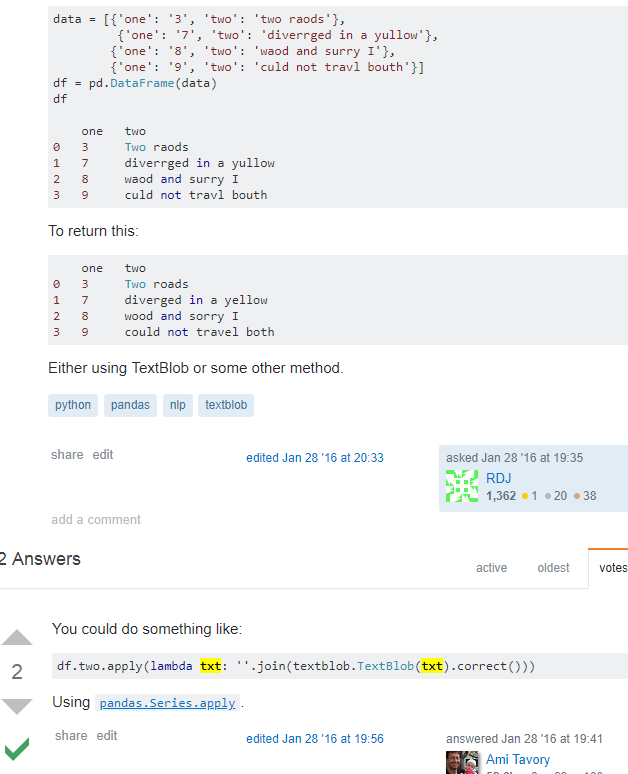

### 복수 -> 단수로 모두 전환

- inflect 이용

In [167]:
import inflect
p = inflect.engine()

words = ["apples", "oranges", "people", "lactobacillales"]

for word in words:
    print("The singular of ", word, " is ", p.singular_noun(word))

The singular of  apples  is  apple
The singular of  oranges  is  orange
The singular of  people  is  person
The singular of  lactobacillales  is  lactobacillale


- textblob 이용

In [168]:
from textblob import TextBlob
words =  ["apples", "oranges", "people", "lactobacillales"]

for i in words:
    blob = TextBlob(i)
    
    print("The singular of ", blob, " is ", blob.words.singularize()[0])


The singular of  apples  is  apple
The singular of  oranges  is  orange
The singular of  people  is  person
The singular of  lactobacillales  is  lactobacillale
